In [1]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torch.autograd import Variable
import PIL.Image as Image
import config

In [2]:
model = torch.load("../model.pth")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
sam = {0:"Ants", 1:"Bees"}
test_transform=[
        transforms.Resize(size=(config.IMAGE_HEIGHT, config.IMAGE_WIDTH), 
                          interpolation=Image.BILINEAR),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.485, 0.456, 0.406),
                             std=(0.229, 0.224, 0.225))]

In [4]:
def get_prediction(image):
    image = Image.open(image)
    for transform_item in test_transform:
        image = transform_item(image)
    if torch.cuda.is_available():
        image = Variable(image.cuda())
    with torch.no_grad():
        image = image.unsqueeze(0)
        output = model(image)
        _, predicted = torch.max(output.data, 1)
    return (predicted)

 Image contains - Bees


[]

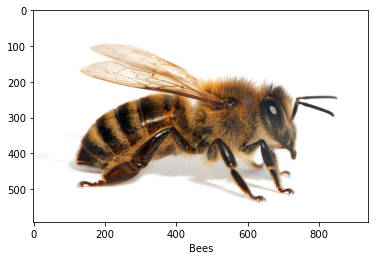

In [5]:
file_path = "test_images/bee-closup.jpg"
tar = get_prediction(file_path)
tar = int(tar)
tar = sam[tar]
print(f" Image contains - {tar}")
image = Image.open(file_path)
plt.imshow(image)
plt.xlabel(tar)
plt.plot()

 Image contains - Ants


[]

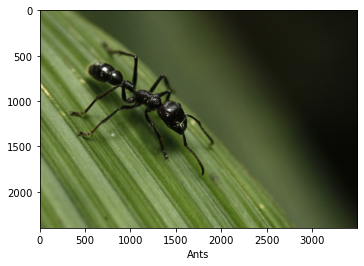

In [6]:
file_path = "test_images/ant.jpg"
tar = get_prediction(file_path)
tar = int(tar)
tar = sam[tar]
print(f" Image contains - {tar}")
image = Image.open(file_path)
plt.imshow(image)
plt.xlabel(tar)
plt.plot()